In [1]:
from collections import defaultdict, Counter
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, classification_report
from sklearn.dummy import DummyClassifier
import xgboost as xgb

from scipy.stats import pearsonr, linregress
import pickle
import numpy as np
import key_functions
import math


from nltk import sent_tokenize
from nltk.corpus import stopwords
from itertools import chain

### Load Annotations DataFrame

In [2]:
gold = pd.read_csv('../data/annotations/gold_annotations.csv')

## Evaluate Using Classifiers

### Dummy Classifier

In [3]:
model, vectorizer, annotated_damages = key_functions.train_classifier('../data/annotations/final_annotations.txt', DummyClassifier(), fit_model = True)

Didnt find any tags in Mawani v. Pitcairn, [2012] B.C.J. No. 1819
Didnt find any tags in Aiken (Guardian ad litem of) v. Van Dyk, [2001] B.C.J. No. 1751
Didnt find any tags in Millard v. Singleton, [2015] B.C.J. No. 1234 %
Didnt find any tags in Cowie v. Draper, [2010] B.C.J. No. 910935154 %
Didnt find any tags in Bajwa v. Deol, [2018] I.L.R. para. G-2792606 %
Didnt find any tags in Jackson v. Fisheries and Oceans Canada, [2006] B.C.J. No. 2654
Didnt find any tags in Los Angeles Salad Co. v. Canadian Food Inspection Agency, [2009] B.C.J. No. 161
Didnt find any tags in Brooks-Martin v. Martin, [2011] B.C.J. No. 243
Didnt find any tags in Gibson v. Matthies, [2017] B.C.J. No. 96556 %
Didnt find any tags in Gray v. Ellis, [2007] I.L.R. para. M-211801 %
Didnt find any tags in Morrow v. Outerbridge, 2009 CHFL para. 15,554
Didnt find any tags in Rackstraw (Litigation guardian of) v. Robertson, [2011] B.C.J. No. 1354
Didnt find any tags in Ahlwat v. Green, [2014] B.C.J. No. 245267576 %
Didnt 

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Cross validation evaluation...
                      precision    recall  f1-score   support

          aggravated       0.00      0.00      0.00        21
         future care       0.04      0.04      0.04       241
    future wage loss       0.05      0.05      0.05       237
             general       0.00      0.00      0.00        87
            in trust       0.06      0.05      0.06        38
       non pecuniary       0.06      0.06      0.06       343
               other       0.59      0.60      0.59      2980
      past wage loss       0.05      0.05      0.05       231
            punitive       0.00      0.00      0.00        39
        reduction by       0.00      0.00      0.00        16
        reduction to       0.00      0.00      0.00        26
             special       0.08      0.08      0.08       256
     sub-future care       0.01      0.01      0.01        78
sub-future wage loss       0.00      0.00      0.00        37
         sub-general       0.00      0

In [4]:
model_cn, vectorizer_cn, annotated_cn = key_functions.train_CN_classifier('../data/annotations/final_annotations.txt', DummyClassifier())

Didnt find any tags in Dr. Andrew Hokhold Inc. v. Wells (c.o.b. Spall Machine & Welding), [2005] B.C.J. No. 255
Didnt find any tags in Cowie v. Draper, [2010] B.C.J. No. 910935154 %
Didnt find any tags in Bajwa v. Deol, [2018] I.L.R. para. G-2792606 %
Didnt find any tags in Jackson v. Fisheries and Oceans Canada, [2006] B.C.J. No. 2654
Didnt find any tags in Kappell v. Brown, [2012] B.C.J. No. 13964507 %
Didnt find any tags in Austin v. Joaquin, [2007] B.C.J. No. 18944 %%
Didnt find any tags in Los Angeles Salad Co. v. Canadian Food Inspection Agency, [2009] B.C.J. No. 161
Didnt find any tags in Fichtner v. Johnston Meier Insurance Services Ltd., [2001] B.C.J. No. 1666
Didnt find any tags in Mclaren v. Rice, [2009] B.C.J. No. 21089966 %%
Didnt find any tags in Gray v. Ellis, [2007] I.L.R. para. M-211801 %
Didnt find any tags in Morrow v. Outerbridge, 2009 CHFL para. 15,554
Didnt find any tags in Paniccia v. Eckert, [2012] B.C.J. No. 19976 %
Didnt find any tags in Johal v. Conron, [2013

/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
path = "../data/Lexis Cases txt/" 
list_of_files = os.listdir(path)

all_cases_parsed =[]
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        with open(path+file, encoding='utf-8') as document:
            document_data = document.read()
        all_cases_parsed.extend(key_functions.parse_BCJ(document_data,
                                                                   model, vectorizer, annotated_damages,  
                                                                   cn_model = model_cn, cn_vectorizer = vectorizer_cn, 
                                                                   annotated_cn=annotated_cn, include_no_damage_cases = True, high_precision_mode = False))

In [10]:
df_all_cases = key_functions.convert_cases_to_DF(all_cases_parsed)
df_all_cases['Percent Reduction'].replace(0, np.nan, inplace = True)
df_all_cases['Percent Reduction'].replace(1, np.nan, inplace = True)

key_functions.evaluate(df_all_cases.iloc[:, :-1], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 280 / 280
Overall accuracy: 100.0 % 280 / 280
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $-1281972617.6022093
Empty field accuracy: 92.94117647058823 % 79 / 85
Filled field accuracy: 4.615384615384616 % 9 / 195
Overall accuracy: 31.428571428571427 % 88 / 280
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $-661858345.3531289
Empty field accuracy: 59.45945945945946 % 22 / 37
Filled field accuracy: 0.411522633744856 % 1 / 243
Overall accuracy: 8.214285714285714 % 23 / 280
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $587758.5146491228
Empty field accuracy: 74.56647398843931 % 129 / 173
Filled field accuracy: 9.345794392523365 % 10 / 107
Overall accuracy: 49.642857142857146 % 139 / 280
-------
COLUMN: $ General Damages
Average distance from correct answer: $-958476949.6608696
Empty field acc

In [5]:
gold['Percent Reduction'] = gold['Case Name'].map(annotated_cn)
key_functions.evaluate(gold[['Case Name', 'Percent Reduction']], gold[['Case Name', '% Reduction as a result of contributory negligence']])

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 298 / 298
Overall accuracy: 100.0 % 298 / 298
-------
COLUMN: % Reduction as a result of contributory negligence
Average distance from correct answer: $0.10875847457627119
Empty field accuracy: 7.450980392156863 % 19 / 255
Filled field accuracy: 83.72093023255815 % 36 / 43
Overall accuracy: 18.456375838926174 % 55 / 298


### Best Classifier - Damages

In [ ]:
model, vectorizer, annotated_damages = key_functions.train_classifier('../data/annotations/final_annotations.txt', LogisticRegression(C = 1, penalty='l2', solver = 'newton-cg', max_iter = 1000, random_state=42), fit_model=True )

In [11]:
damages_model = pickle.load(open('./best_model_ALL.pkl', 'rb'))
damages_vectorizer_all = pickle.load(open('./best_vectorizer_ALL.pkl', 'rb'))
damages_dict = pickle.load(open('./annotated_damages_dict', 'rb'))

### Best Classifier - Percent Reduction

In [36]:
model_cn, vectorizer_cn, annotated_cn = key_functions.train_CN_classifier('../data/annotations/final_annotations.txt', LogisticRegression(C = 1, penalty='l1', solver = 'liblinear', class_weight = 'balanced', max_iter = 10000, random_state=42))

Reading training data and extracting features... 99.65870307167235 %% 48.4641638225256 %
Vectorizing...
Tag Distribution
Counter({'other': 705, 'cnd': 149, 'cnp': 148, 'sub-cnd': 6})


/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/ilana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation evaluation...
              precision    recall  f1-score   support

         cnd       0.69      0.72      0.71       149
         cnp       0.59      0.56      0.58       148
       other       0.90      0.90      0.90       705
     sub-cnd       0.71      0.83      0.77         6

    accuracy                           0.83      1008
   macro avg       0.72      0.76      0.74      1008
weighted avg       0.82      0.83      0.82      1008

Training final model...


### Best Statistical Classifier Overall Results

In [37]:
path = "../data/Lexis Cases txt/" 
list_of_files = os.listdir(path)

all_cases_parsed =[]
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        with open(path+file, encoding='utf-8') as document:
            document_data = document.read()
        all_cases_parsed.extend(key_functions.parse_BCJ(document_data,
                                                                   model, vectorizer, annotated_damages,  
                                                                   cn_model = model_cn, cn_vectorizer = vectorizer_cn, 
                                                                   annotated_cn=annotated_cn, include_no_damage_cases = True, high_precision_mode = False))

P1.txt
P21.txt
P64.txt
P14.txt
P41.txt
P11.txt
P60.txt
P48.txt
P83.txt
P23.txt
P73.txt
P26.txt
P75.txt
P65.txt
P32.txt
P34.txt
P16.txt
P37.txt
P7.txt
P51.txt
P30.txt
P25.txt
P62.txt
P19.txt
P53.txt
P49.txt
P39.txt
P45.txt
P72.txt
P55.txt
P81.txt
P22.txt
P28.txt
ERROR: cant convert string, 0%
P58.txt
P46.txt
P3.txt
P5.txt
P8.txt
P56.txt
P43.txt
P36.txt
P2.txt
P13.txt
P67.txt
P38.txt
P79.txt
P57.txt
P80.txt
P84.txt
P54.txt
P50.txt
P77.txt
P20.txt
P24.txt
P85.txt
P10.txt
P6.txt
P35.txt
P74.txt
P27.txt
P78.txt
P61.txt
P71.txt
P9.txt
P70.txt
P44.txt
P15.txt
P82.txt
P69.txt
P29.txt
P18.txt
P4.txt
P40.txt
P66.txt
P12.txt
P59.txt
P63.txt
P68.txt
P33.txt
P47.txt
P76.txt
P52.txt
P31.txt
P17.txt
P42.txt


In [40]:
df_all_cases = key_functions.convert_cases_to_DF(all_cases_parsed)
df_all_cases['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_all_cases[:10]

,Case Number,Case Name,Year,Total Damage,Total Pecuniary,Non Pecuniary,General,Special,Punitive,Aggravated,Future Care,Judge Name,Decision Length,Multiple defendants?,Plaintiff Wins?,Contributory Negligence Raised,Written Decision?,Registry,Contributory Negligence Successful,Percent Reduction
0,1 of 1,"Mawani v. Pitcairn, [2012] B.C.J. No. 1819",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S.F. Kelleher J.,115,Y,Y,True,True,Vancouver,True,0.50
1,2 of 1,"Ediger (Guardian ad litem of) v. Johnston, [20...",2009,3224000.0,630000.00,260000.0,590000.0,40000.00,NaN,NaN,NaN,H.J. Holmes J.,350,N,Y,False,True,Vancouver,False,NaN
2,3 of 1,"Furness v. Guest, [2010] B.C.J. No. 1388",2010,NaN,1020.70,40000.0,NaN,1020.70,NaN,NaN,NaN,D.A. Halfyard J.,97,Y,Y,True,True,Nanaimo,True,0.75
3,4 of 1,"Howell v. Machi, [2017] B.C.J. No. 2016",2017,NaN,1803781.77,275000.0,1775000.0,28781.77,100000.0,NaN,NaN,H. MacNaughton,525,Y,Y,True,True,Vancouver,True,0.25
4,5 of 1,"Morrow v. Outerbridge, [2009] B.C.J. No. 640",2009,NaN,2706544.00,NaN,2451229.0,255315.00,NaN,NaN,NaN,E.A. Bennett J.,311,Y,Y,False,True,Vancouver,False,NaN
5,6 of 1,"Parlby v. Starr, [2017] B.C.J. No. 2621",2017,NaN,2285820.58,290000.0,1265141.0,12652.24,NaN,NaN,1008027.34,M.L. Fleming J.,593,Y,Y,True,True,Vancouver,True,0.35
6,7 of 1,"Minhas v. Sartor, [2012] B.C.J. No. 1087",2012,NaN,120282.00,NaN,NaN,24466.00,NaN,NaN,95816.00,W.G. Baker J.,462,N,Y,True,True,New Westminster,True,0.20
7,8 of 1,"Glanville v. Moberg, [2014] B.C.J. No. 1869",2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.A. Warren J.,127,Y,Y,True,True,Vancouver and New Westminster,True,0.30
8,9 of 1,"Watkins v. Dormuth, [2014] B.C.J. No. 557",2014,965827.1,783494.82,175000.0,525000.0,255077.00,NaN,NaN,3417.82,M.B. Blok J.,305,Y,Y,False,True,Campbell River,False,NaN
9,10 of 1,"Paur (Committee of) v. Providence Health Care,...",2015,NaN,35594.28,355300.0,NaN,35594.28,NaN,NaN,NaN,S.A. Griffin J.,755,Y,Y,True,True,Vancouver,False,NaN


In [41]:
df_all_cases['Contributory Negligence Successful'].replace(True, 'Y', inplace=True)
df_all_cases['Contributory Negligence Successful'].replace(False, 'N', inplace= True)
df_all_cases['Percent Reduction'].replace(0, np.nan, inplace = True)
df_all_cases['Percent Reduction'].replace(1, np.nan, inplace = True)

In [43]:
key_functions.evaluate(df_all_cases, gold)

#### Evaluation ####


/home/ilana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


-------
COLUMN: Case Number
Filled field accuracy: 10.357142857142858 % 29 / 280
Overall accuracy: 10.357142857142858 % 29 / 280
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 280 / 280
Overall accuracy: 100.0 % 280 / 280
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $1016308.4929500001
Empty field accuracy: 98.82352941176471 % 84 / 85
Filled field accuracy: 24.615384615384617 % 48 / 195
Overall accuracy: 47.14285714285714 % 132 / 280
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $232376.51743243248
Empty field accuracy: 81.08108108108108 % 30 / 37
Filled field accuracy: 17.28395061728395 % 42 / 243
Overall accuracy: 25.71428571428571 % 72 / 280
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $71250.0
Empty field accuracy: 95.95375722543352 % 166 / 173
Filled field accuracy: 83.17757009345794 % 89 / 107
Overall accuracy: 91.07142857142857 % 255 / 280
-------


### High Precision Accuracies - Use `high_precision_mode = True`, No Sub-Categories

In [ ]:
path = "../data/Lexis Cases txt/" 
list_of_files = os.listdir(path)

all_cases_parsed =[]
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        with open(path+file, encoding='utf-8') as document:
            document_data = document.read()
        all_cases_parsed.extend(key_functions.parse_BCJ(document_data,
                                                                   model, vectorizer, annotated_damages,  
                                                                   cn_model = model_cn, cn_vectorizer = vectorizer_cn, 
                                                                   annotated_cn=annotated_cn, include_no_damage_cases = False, high_precision_mode = True))

In [54]:
df_all_cases = key_functions.rule_based_convert_cases_to_DF(all_cases_parsed)
df_all_cases['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_all_cases['Contributory Negligence Successful'].replace(True, 'Y', inplace=True)
df_all_cases['Contributory Negligence Successful'].replace(False, 'N', inplace= True)
df_all_cases['Percent Reduction'].replace(0, np.nan, inplace = True)
df_all_cases['Percent Reduction'].replace(1, np.nan, inplace = True)

In [55]:
key_functions.evaluate(df_all_cases[['Case Name','Total Damage']], gold) 

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $1016308.4929500001
Empty field accuracy: 98.0 % 49 / 50
Filled field accuracy: 27.586206896551722 % 48 / 174
Overall accuracy: 43.30357142857143 % 97 / 224


In [57]:
key_functions.evaluate(df_all_cases[['Case Name','Non Pecuniary']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $71250.0
Empty field accuracy: 94.26229508196722 % 115 / 122
Filled field accuracy: 87.25490196078431 % 89 / 102
Overall accuracy: 91.07142857142857 % 204 / 224


In [58]:
key_functions.evaluate(df_all_cases[['Case Name','General']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ General Damages
Average distance from correct answer: $20051.90769230769
Empty field accuracy: 96.26865671641791 % 129 / 134
Filled field accuracy: 52.22222222222223 % 47 / 90
Overall accuracy: 78.57142857142857 % 176 / 224


In [59]:
key_functions.evaluate(df_all_cases[['Case Name','Future Care']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: Future Care Costs (General Damages)
Average distance from correct answer: $1627877.6541666668
Empty field accuracy: 96.02649006622516 % 145 / 151
Filled field accuracy: 83.56164383561644 % 61 / 73
Overall accuracy: 91.96428571428571 % 206 / 224


In [60]:
key_functions.evaluate(df_all_cases[['Case Name','Special']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ Special damages Pecuniary (ie. any expenses already incurred)
Average distance from correct answer: $-29864.237619047617
Empty field accuracy: 94.9579831932773 % 113 / 119
Filled field accuracy: 58.0952380952381 % 61 / 105
Overall accuracy: 77.67857142857143 % 174 / 224


In [61]:
key_functions.evaluate(df_all_cases[['Case Name','Total Pecuniary']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $232376.51743243248
Empty field accuracy: 74.07407407407408 % 20 / 27
Filled field accuracy: 21.31979695431472 % 42 / 197
Overall accuracy: 27.67857142857143 % 62 / 224


In [63]:
key_functions.evaluate(df_all_cases[['Case Name','Punitive']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $ Punitive Damages
Average distance from correct answer: $127500.0
Empty field accuracy: 99.06542056074767 % 212 / 214
Filled field accuracy: 90.0 % 9 / 10
Overall accuracy: 98.66071428571429 % 221 / 224


In [64]:
key_functions.evaluate(df_all_cases[['Case Name','Aggravated']], gold)

#### Evaluation ####
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 224 / 224
Overall accuracy: 100.0 % 224 / 224
-------
COLUMN: $Aggravated Damages
Empty field accuracy: 100.0 % 215 / 215
Filled field accuracy: 44.44444444444444 % 4 / 9
Overall accuracy: 97.76785714285714 % 219 / 224


## Compare Bootstrapped Medians for Total Damages, Predicted vs Gold, Same Cases - Classifier Results

In [65]:
annotated_case_names = set(gold[(gold['$ Non-Pecuniary Damages']>0)& (gold['$ Non-Pecuniary Damages']!= np.nan)]['Case Name'])
len(annotated_case_names)

110

In [66]:
dev_cases = set(df_all_cases[df_all_cases['Case Name'].isin(annotated_case_names) & (df_all_cases['Non Pecuniary']>0)& (df_all_cases['Non Pecuniary']!= np.nan)]['Case Name'])
len(dev_cases)

94

Sample from cases where both gold and dev amounts are greater than 0

In [68]:

case_names = annotated_case_names & dev_cases
len(case_names)

94

### Change DataFrame Filter to get Bootstrap for Different Damage Categories

95.0 confidence interval for our gold data is: $118161.2 and $223797.1, and for dev: $113710.5 and $229836.7
95.0 confidence interval for gold minus predicted is: $-49831.1 and $61839.5


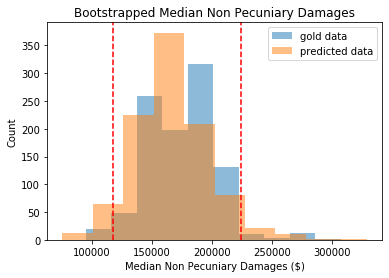

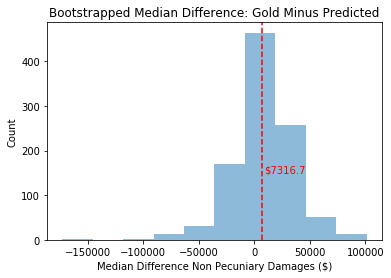

In [92]:
from sklearn.utils import resample

# configure bootstrap
n_iterations = 1000
n_size = int(len(case_names) * 0.5)
# run bootstrap
stats_gold = []
stats_dev = []
difference = []
for i in range(n_iterations):
    sub_sample = resample(list(case_names), n_samples=n_size)
    median_gold = np.median(gold[gold['Case Name'].isin(sub_sample)&(gold['$ Damages total before contributory negligence']>0)& (gold['$ Damages total before contributory negligence']!= np.nan)]['$ Damages total before contributory negligence'])
    median_dev = np.median(df_all_cases[df_all_cases['Case Name'].isin(sub_sample)&(df_all_cases['Total Damage']>0)& (df_all_cases['Total Damage']!= np.nan)]['Total Damage'])
    stats_gold.append(median_gold)
    stats_dev.append(median_dev)
    difference.append(median_gold-median_dev)
    
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_gold =  np.percentile(stats_gold, p)
lower_dev = np.percentile(stats_dev, p)
lower_difference =  np.percentile(difference, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_gold = np.percentile(stats_gold, p)
upper_dev = np.percentile(stats_dev, p)
upper_difference = np.percentile(difference, p)
print('%.1f confidence interval for our gold data is: $%.1f and $%.1f, and for dev: $%.1f and $%.1f' % (alpha*100, lower_gold, upper_gold, lower_dev, upper_dev))
print('%.1f confidence interval for gold minus predicted is: $%.1f and $%.1f' % (alpha*100, lower_difference, upper_difference))

# plot scores
ax = plt.subplot()
plt.hist(stats_gold, alpha = 0.5,  label = 'gold data')
plt.hist(stats_dev, alpha = 0.5, label = 'predicted data')
plt.axvline(lower_gold, color='r', linestyle='--')
plt.axvline(upper_gold, color='r', linestyle='--')
plt.title("Bootstrapped Median Non Pecuniary Damages")

plt.xlabel('Median Non Pecuniary Damages ($)')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.hist(difference, alpha = 0.5)
plt.axvline(np.median(difference), color='r', linestyle='--')
plt.xlabel('Median Difference Non Pecuniary Damages ($)')
plt.ylabel('Count')
plt.annotate('$%0.1f'%np.median(difference), (np.median(difference)+1500,150), color = 'r')
plt.title('Bootstrapped Median Difference: Gold Minus Predicted')
# plt.legend()
plt.show()


### Statistical Significance - Median Total Damage per year

In [76]:
def get_relationship_over_time(damage_type, df):
    filtered_dev = df[(df['Year']!= math.nan) & (df[damage_type] > 0)]
    filtered_dev[damage_type] = pd.to_numeric(filtered_dev[damage_type])
    grouped = filtered_dev.groupby('Year').median().reset_index()
    x = pd.to_numeric(grouped.Year)
    y = pd.to_numeric(grouped[damage_type])
    corr, pval = pearsonr(x, y)
    print('correlation between Year and Median %s is: %s with a pvalue of %s'%(damage_type, corr, pval))
    return linregress(x, y), 

In [75]:
get_relationship_over_time('Total Damage', df_all_cases)

NameError: name 'get_relationship_over_time' is not defined

In [101]:
get_relationship_over_time('Non Pecuniary', df_all_cases)

correlation between Year and Median Non Pecuniary is: 0.7626543589270809 with a pvalue of 5.825928177119583e-05


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=2711.0389610389607, intercept=-5378962.121212121, rvalue=0.7626543589270808, pvalue=5.825928177119612e-05, stderr=527.4792881790837),)

In [102]:
get_relationship_over_time('Total Pecuniary', df_all_cases)

correlation between Year and Median Total Pecuniary is: 0.7940657446537204 with a pvalue of 1.7276100047883053e-05


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=7701.254311688311, intercept=-15386529.342683982, rvalue=0.7940657446537203, pvalue=1.7276100047883147e-05, stderr=1352.420287652023),)

In [83]:
get_relationship_over_time('General', df_all_cases)

correlation between Year and Median General is: 0.5936118006143773 with a pvalue of 0.004555479754572426


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=3977.5181818181813, intercept=-7891253.521645021, rvalue=0.5936118006143775, pvalue=0.004555479754572417, stderr=1237.0710965754843),)

In [84]:
get_relationship_over_time('Future Care', df_all_cases)

correlation between Year and Median Future Care is: 0.37116748033063585 with a pvalue of 0.0976123529122324


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=543.8124935064935, intercept=-1074652.3505194804, rvalue=0.3711674803306359, pvalue=0.09761235291223239, stderr=312.1154091940267),)

In [85]:
get_relationship_over_time('Special', df_all_cases)

correlation between Year and Median Special is: 0.6356760989016429 with a pvalue of 0.0019550876762802678


/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(LinregressResult(slope=1090.016538961039, intercept=-2170175.217359307, rvalue=0.635676098901643, pvalue=0.00195508767628026, stderr=303.67769215650355),)

## Rule-Based Evaluation

In [ ]:
for file in list_of_files:
    if file != ".DS_Store" and file != ".ipynb_checkpoints":
        with open(path+file, encoding='utf-8') as document:
            document_data = document.read()
        all_cases_parsed.extend(key_functions.parse_BCJ(document_data, include_no_damage_cases = False, high_precision_mode = True))

In [70]:
df_rule_based= key_functions.convert_cases_to_DF(all_cases_parsed)
df_rule_based['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_rule_based[:10]

,Case Number,Case Name,Year,Total Damage,Total Pecuniary,Non Pecuniary,General,Special,Punitive,Aggravated,Future Care,Judge Name,Decision Length,Multiple defendants?,Plaintiff Wins?,Contributory Negligence Raised,Written Decision?,Registry,Contributory Negligence Successful,Percent Reduction
0,1 of 1,"Mawani v. Pitcairn, [2012] B.C.J. No. 1819",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S.F. Kelleher J.,115,Y,Y,True,True,Vancouver,True,0.50
1,2 of 1,"Ediger (Guardian ad litem of) v. Johnston, [20...",2009,20000.00,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,H.J. Holmes J.,350,N,Y,False,True,Vancouver,False,NaN
2,3 of 1,"Furness v. Guest, [2010] B.C.J. No. 1388",2010,42041.40,42041.40,NaN,NaN,42041.40,NaN,NaN,NaN,D.A. Halfyard J.,97,Y,Y,True,True,Nanaimo,True,0.75
3,4 of 1,"Howell v. Machi, [2017] B.C.J. No. 2016",2017,2178781.77,2178781.77,NaN,2050000.0,28781.77,100000.0,NaN,NaN,H. MacNaughton,525,Y,Y,True,True,Vancouver,True,0.25
4,5 of 1,"Morrow v. Outerbridge, [2009] B.C.J. No. 640",2009,800000.00,800000.00,NaN,NaN,NaN,800000.0,NaN,NaN,E.A. Bennett J.,311,Y,Y,False,True,Vancouver,False,NaN
5,6 of 1,"Parlby v. Starr, [2017] B.C.J. No. 2621",2017,2678470.58,2388470.58,290000.0,1265141.0,115302.24,NaN,NaN,1008027.34,M.L. Fleming J.,593,Y,Y,True,True,Vancouver,True,0.35
6,7 of 1,"Minhas v. Sartor, [2012] B.C.J. No. 1087",2012,95816.00,25816.00,70000.0,NaN,24466.00,NaN,NaN,1350.00,W.G. Baker J.,462,N,Y,True,True,New Westminster,True,0.20
7,8 of 1,"Glanville v. Moberg, [2014] B.C.J. No. 1869",2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.A. Warren J.,127,Y,Y,True,True,Vancouver and New Westminster,True,0.70
8,9 of 1,"Watkins v. Dormuth, [2014] B.C.J. No. 557",2014,965827.10,790827.10,175000.0,525000.0,255077.10,NaN,NaN,10750.00,M.B. Blok J.,305,Y,Y,False,True,Campbell River,False,NaN
9,10 of 1,"Paur (Committee of) v. Providence Health Care,...",2015,362934.28,7634.28,355300.0,NaN,5594.28,NaN,NaN,2040.00,S.A. Griffin J.,755,Y,Y,True,True,Vancouver,False,NaN


In [71]:
df_rule_based= key_functions.rule_based_convert_cases_to_DF(all_cases_parsed)
df_rule_based['Contributory Negligence Successful'].replace(np.nan, False, inplace = True)
df_rule_based['Contributory Negligence Successful'].replace(True, 'Y', inplace=True)
df_rule_based['Contributory Negligence Successful'].replace(False, 'N', inplace= True)
df_rule_based['Percent Reduction'].replace(0, np.nan, inplace = True)
df_rule_based['Percent Reduction'].replace(1, np.nan, inplace = True)

In [73]:
key_functions.evaluate(df_rule_based, gold)

#### Evaluation ####


/home/ilana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


-------
COLUMN: Case Number
Filled field accuracy: 10.357142857142858 % 29 / 280
Overall accuracy: 10.357142857142858 % 29 / 280
-------
COLUMN: Case Name
Filled field accuracy: 100.0 % 280 / 280
Overall accuracy: 100.0 % 280 / 280
-------
COLUMN: $ Damages total before contributory negligence
Average distance from correct answer: $-170271.1371875
Empty field accuracy: 97.6470588235294 % 83 / 85
Filled field accuracy: 29.230769230769234 % 57 / 195
Overall accuracy: 50.0 % 140 / 280
-------
COLUMN: $ Pecuniary Damages Total
Average distance from correct answer: $-66438.0703508772
Empty field accuracy: 83.78378378378379 % 31 / 37
Filled field accuracy: 17.28395061728395 % 42 / 243
Overall accuracy: 26.071428571428573 % 73 / 280
-------
COLUMN: $ Non-Pecuniary Damages
Average distance from correct answer: $-4666.666666666667
Empty field accuracy: 100.0 % 173 / 173
Filled field accuracy: 53.271028037383175 % 57 / 107
Overall accuracy: 82.14285714285714 % 230 / 280
-------
COLUMN: $ General

In [77]:
for col in df_rule_based.columns[3:11]:
    print(get_relationship_over_time(col, df_rule_based), '\n')
    print('=====')

correlation between Year and Median Total Damage is: 0.8119689829606106 with a pvalue of 7.848272065943638e-06
(LinregressResult(slope=7579.604474025973, intercept=-15133353.208982682, rvalue=0.8119689829606105, pvalue=7.848272065943682e-06, stderr=1250.029984433798),) 

=====
correlation between Year and Median Total Pecuniary is: 0.7090751784287639 with a pvalue of 0.000319655322797451
(LinregressResult(slope=6928.283123376622, intercept=-13838471.620367963, rvalue=0.7090751784287638, pvalue=0.000319655322797452, stderr=1580.6201535653026),) 

=====
correlation between Year and Median Non Pecuniary is: 0.5238031227793404 with a pvalue of 0.014803902487671836
(LinregressResult(slope=2457.7922077922076, intercept=-4867757.575757575, rvalue=0.5238031227793404, pvalue=0.01480390248767185, stderr=916.9760240849272),) 

=====
correlation between Year and Median General is: 0.7070517943528324 with a pvalue of 0.00033840330809077704
(LinregressResult(slope=3150.1237077922083, intercept=-6260

/home/ilana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
